In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

check counts ratio in 010dex radius bin of L1000N1800 of halo mass 13.5-14 solar mass in flamingo
plot percentile 16, 84, median and mean

/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/tmp/ipykernel_57508/608230262.py:20: RuntimeWarning: Mean of empty slice
  plt.plot(r, np.nanmean(res, axis=1), label = 'mean')
/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


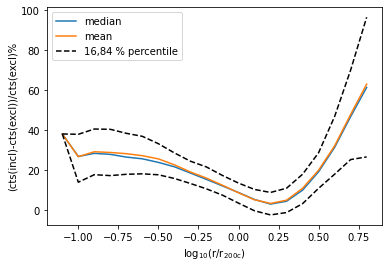

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

workpath = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/redshift_01/L1000N1800/profiles_230718_13.5'
ctsprof_incl = pd.read_csv(f'{workpath}/cts_010dex_incl_sph.csv')
ctsprof_excl = pd.read_csv(f'{workpath}/cts_010dex_excl_sph.csv')

res = (ctsprof_incl-ctsprof_excl)/ctsprof_excl * 100

xbins_med = np.arange(-1.5, 1, 0.1)
r = xbins_med

# msk the bins where the excl counts <50
ctsmsk = ctsprof_excl>=50
res = res[ctsmsk]


plt.plot(r, np.nanmedian(res, axis=1), label = 'median')
plt.plot(r, np.nanmean(res, axis=1), label = 'mean')
plt.plot(r, np.nanpercentile(res, 84, axis=1), color = 'k', linestyle = '--', label = '16,84 % percentile')
plt.plot(r, np.nanpercentile(res, 16, axis=1), color = 'k',linestyle = '--')

plt.ylabel('(cts(incl)-cts(excl))/cts(excl)%')
plt.xlabel('$\\rm log_{10}(r/r_{200c})$')
plt.legend()

/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/cosma/local/Python/3.10.1/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:997: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


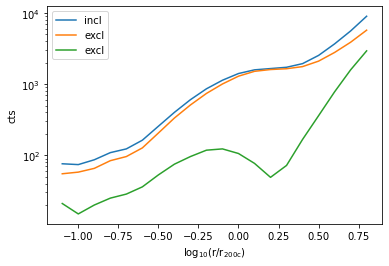

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

workpath = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/redshift_01/L1000N1800/profiles_230718_13.5'
ctsprof_incl = pd.read_csv(f'{workpath}/cts_010dex_incl_sph.csv')
ctsprof_excl = pd.read_csv(f'{workpath}/cts_010dex_excl_sph.csv')

res = (ctsprof_incl-ctsprof_excl)/ctsprof_excl

xbins_med = np.arange(-1.5, 1, 0.1)
r = xbins_med

# msk the bins where the excl counts <50
ctsmsk = ctsprof_excl>=50
res = res[ctsmsk]

plt.plot(r[:-1], np.nanmedian(ctsprof_incl[ctsmsk][:-1], axis=1), label = 'incl')
plt.plot(r[:-1], np.nanmedian(ctsprof_excl[ctsmsk][:-1], axis=1), label = 'excl')
plt.plot(r[:-1], np.nanmedian(ctsprof_incl[ctsmsk][:-1]-ctsprof_excl[ctsmsk][:-1], axis=1), label = 'res')

# plt.plot(r, np.nanmedian(res, axis=1), label = 'median')
# plt.plot(r, np.nanmean(res, axis=1), label = 'mean')
# plt.plot(r, np.nanpercentile(res, 84, axis=1), color = 'k', linestyle = '--', label = '16,84 % percentile')
# plt.plot(r, np.nanpercentile(res, 16, axis=1), color = 'k',linestyle = '--')

plt.yscale('log')
plt.ylabel('cts')
plt.xlabel('$\\rm log_{10}(r/r_{200c})$')
plt.legend()

Test in halo particle files
1. save 100x not necessary particles information
2. Result should be correct about w/ or w/o rhp

In [33]:
workpath = '/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/redshift_01/L1000N1800/xraysb_csvs_230718_13.5_groups_1028halos_cyl'
# randomly choose a halo 
halofile = pd.read_csv(f'{workpath}/xray_linelum_snapshot75_halo9937651_partlum.csv')

sumfile = pd.read_csv(f'{workpath}/xray_linelum_snapshot75_halomass_btw_135_140.csv')

# Caution: The jointmsk saved is not for particles in 6.5 Mpc cylinder, it is in 30 Mpc box! 
# If we want to look at the recently heated particles included and excluded difference
# we need to further filtered the all particles with a spatial mask
def msk_in_sph_new(coor, halo_center, r1, r2):
    dists = np.linalg.norm(coor-halo_center, axis=1)
    where = (dists< r2) & (dists>=r1)
    return where

# if we filter the all particles in r200c

# read halo gas mass center from the sumfile
haloid = 9937651 + 1
halomsk = sumfile['halo_ids'] == haloid
center = np.array([float(sumfile['x_gasmass_center'][halomsk]), float(sumfile['y_gasmass_center'][halomsk]), float(sumfile['z_gasmass_center'][halomsk])])
r200c = float(sumfile['r200c'][halomsk]) # Mpc

# read coordinates from halofile
coords = np.array([halofile['part_ycoords'], halofile['part_zcoords'], halofile['tot_abun_to_solar']]).T

# filter the coordinates in 30Mpc box with r200c of the halo 
radmsk = msk_in_sph_new(coords, center, 0, 10**0.1 * r200c)
print(np.sum(radmsk)) # particle number in r200c with recently heated particle
print(np.sum(radmsk & halofile['jointmsk'])) # particle number in r200c w/o recently heated particle
'''
particle number in r200c with recently heated particle is 1740
particle number in r200c w/o recently heated particle is 1681
ratio of particles in r200c with rhp and w/o rhp is 1.035
'''
print(np.sum(halofile['part_masses'][radmsk])) # particle number in r200c with recently heated particle
print(np.sum(halofile['part_masses'][radmsk & halofile['jointmsk']])) # particle number in r200c w/o recently heated particle
'''
particle gas masses in r200c with recently heated particle is 200.9
particle gas masses in r200c w/o recently heated particle is 192.4
ratio of gas masses in r200c with rhp and w/o rhp is 1.04
'''

2545
2485
291.960130141
283.390553886


'\nparticle gas masses in r200c with recently heated particle is 200.9\nparticle gas masses in r200c w/o recently heated particle is 192.4\nratio of gas masses in r200c with rhp and w/o rhp is 1.04\n'

Test about the profile of the same halo 9937651 + 1, index  = 1006

In [8]:
idx = '1006'

# load the profiles
workpath = '/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/redshift_01/L1000N1800/profiles_230718_13.5'
cts_incl = pd.read_csv(f'{workpath}/cts_010dex_incl_sph.csv')
cts_excl = pd.read_csv(f'{workpath}/cts_010dex_excl_sph.csv')
mass_incl = pd.read_csv(f'{workpath}/part_masses_010dex_incl_sph.csv')
mass_excl = pd.read_csv(f'{workpath}/part_masses_010dex_excl_sph.csv')

# load the x axis
xbins_med = np.arange(-1.5, 1, 0.1)
xbins_mean = np.arange(-1.5, 1, 0.25)
r = xbins_med

# counts the particle number of this halo inside the r200c
print(np.sum(cts_excl[idx][r<=0]))
print(np.sum(mass_excl[idx][r<=0]))
'''
The particle number in r200c w/o rhp is 1681.0
The total gas mass in r200c w/o rhp is 192.447971747

align with previous cell, therefore the excl profiles are correct
'''

# counts the particle number of this halo inside the r200c
print(np.sum(cts_incl['0'][r<=0]))
print(np.sum(mass_incl['0'][r<=0]))
'''
The particle number in r200c w/o rhp is 2977
The total gas mass in r200c w/o rhp is 339.3

NOT align with previous cell, therefore the incl profiles are NOT correct
'''

1681.0
192.447971747
2980.0
348.355547396


'\nThe particle number in r200c w/o rhp is 2977\nThe total gas mass in r200c w/o rhp is 339.3\n\nNOT align with previous cell, therefore the incl profiles are NOT correct\n'

Debug the incl profiles :
the bug was forget to change 1 to r200c in incl function.

In [77]:
import numba as nb
@nb.jit(nopython=True)
def msk_in_sph(coor, halo_center, r1, r2):
    n = 3
    where = np.empty(coor.shape[0], dtype=np.bool_)
    for i in range(coor.shape[0]):
        d2 = 0.0
        for k in range(n):
            d2 += (coor[i,k] - halo_center[k])**2
        where[i] = (d2 < r2**2) & (d2 >= r1**2)
    
    return where

def cal_xraylum_incl():
    haloid = 9937651 + 1
    halo_cen = center
    snapnum = 75
    # print(f'cal halo{haloid} ...')
    bins = np.insert(np.power(10, r), 0, 0) * r200c #Mpc
    print(bins)
    arr1 = np.zeros(len(bins)-1)
    arr2 = np.zeros(len(bins)-1)
    print(f'{workpath}/xray_linelum_snapshot{snapnum}_halo{int(haloid - 1)}_partlum.csv')
    olddf_part = pd.read_csv(f'{workpath}/xray_linelum_snapshot{snapnum}_halo{int(haloid - 1)}_partlum.csv')
    # filter the coordinates in 30Mpc box with r200c of the halo 
    radmsk = msk_in_sph(coords, center, 0, r200c)
    print(np.sum(radmsk), np.sum(radmsk & np.array(olddf_part['jointmsk'])))
    for j in range(len(bins)-1):
        radmsk = msk_in_sph(coords, halo_cen, bins[j], bins[j+1])
        arr1[j] = np.nansum(radmsk & np.array(olddf_part['jointmsk']))
        arr2[j] = np.nansum(radmsk)

    return arr1, arr2
arr1, arr2 = cal_xraylum_incl()
# np.array([olddf_part['part_ycoords'], olddf_part['part_zcoords'], olddf_part['tot_abun_to_solar']]).T

[0.         0.02262387 0.02848177 0.03585642 0.04514056 0.0568286
 0.07154297 0.09006726 0.11338797 0.14274699 0.17970782 0.22623874
 0.28481769 0.35856423 0.45140562 0.56828601 0.7154297  0.90067263
 1.13387966 1.42746992 1.79707816 2.26238736 2.84817694 3.58564232
 4.51405624 5.68286011]
/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/results/redshift_01/L1000N1800/xraysb_csvs_230718_13.5_groups_1028halos_cyl/xray_linelum_snapshot75_halo9937651_partlum.csv
1740 1681


In [37]:
print(r[r<=0.2])

[-1.50000000e+00 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00
 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01
 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01
 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01  1.33226763e-15
  1.00000000e-01]


In [78]:
print(np.round(r,2))

print(np.cumsum(arr1[np.round(r,2) <=0]))
print(np.cumsum(arr2[np.round(r,2) <=0]))

[-1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2
 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[0.000e+00 1.000e+00 1.000e+00 3.000e+00 5.000e+00 6.000e+00 1.400e+01
 3.000e+01 5.500e+01 9.400e+01 1.580e+02 2.670e+02 4.350e+02 7.080e+02
 1.125e+03 1.681e+03]
[   4.   10.   12.   19.   23.   24.   32.   48.   73.  112.  176.  285.
  453.  730. 1162. 1740.]


In [71]:
def cal_xraylum_excl():

    # load parameter of single halo 
    haloid = 9937651 + 1
    halo_cen = center
    bins = np.insert(np.power(10, r),0,0) * r200c #Mpc
    snapnum = 75

    olddf_part = pd.read_csv(f'{workpath}/xray_linelum_snapshot{snapnum}_halo{int(haloid-1)}_partlum.csv')

    # initialize
    arr  = np.zeros(len(bins)-1)
    for j in range(len(bins)-1):
        radmsk = msk_in_sph_new(coords, halo_cen, bins[j], bins[j+1])
        arr[j] = np.nansum(np.array(olddf_part['jointmsk']) & radmsk)
 
    return arr

arr = cal_xraylum_excl()
print(np.cumsum(arr[r<=0.1]))



[0.000e+00 1.000e+00 1.000e+00 3.000e+00 5.000e+00 6.000e+00 1.400e+01
 3.000e+01 5.500e+01 9.400e+01 1.580e+02 2.670e+02 4.350e+02 7.080e+02
 1.125e+03 1.681e+03]
